<a href="https://colab.research.google.com/github/EmamulHossen/CIFAR-10-Image-Classification-Using-CNN/blob/main/cifar_10_image_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR-10**

**The CIFAR-10 dataset (Canadian Institute for Advanced Research, 10 classes) is a subset of the Tiny Images dataset and consists of 60000 32x32 color images. The images are labelled with one of 10 mutually exclusive classes: airplane, automobile (but not truck or pickup truck), bird, cat, deer, dog, frog, horse, ship, and truck (but not pickup truck). There are 6000 images per class with 5000 training and 1000 testing images per cl**ass.

**Classes: The ten classes in CIFAR-10 are as follows:**
1. **Airplane**<br/>
2. **Automobile**<br/>
3. **Bird**<br/>
4. **Cat**<br/>
5. **Deer**<br/>
6. **Dog**<br/>
7. **Frog**<br/>
8. **Horse**<br/>
9. **Ship**<br/>
10. **Truck**<br/>

![](https://kibernetika.ai/wp-content/uploads/2018/11/CIFAR-10.png)

# **Import Requirement Modules**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras import layers
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



In [2]:
EPOCHS =10
num_classes = 10
batch_size = 64 #It determines the number of data samples that are processed by the model in each forward and backward pass (also known as an iteration or training step) of a single training epoch.
image_size = 32
input_shape = (image_size, image_size, 3) #Image height,image width & Color Channel


In [3]:
#Load dataset
(train_img,train_label),(test_img,test_label)=datasets.cifar10.load_data()

#Normalize the train_img & test_img
train_img ,test_img =train_img/255.0  ,test_img/255.0


170498071/170498071 [==============================] - 6s 0us/step


In [4]:
train_img.shape,test_img.shape #Traing image shape & test image shape.Here the number of train image 50000 & the number of test image 10000

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
#first train_img normalized value.
print(train_img[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [6]:
#Define the CNN Model

model=Sequential() #Sequential API is used to create models layer-by-layer
#Input Layer
model.add(layers.Conv2D(32,(3,3),strides=(1,1), activation='relu', padding="same", input_shape=(image_size,image_size,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())


# First Convolutional Layer
model.add(layers.Conv2D(64,(3,3),strides=(1,1), activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))  #Dropout is a regularization technique used in neural networks to prevent overfitting.
model.add(layers.BatchNormalization())
#BatchNormalization is a technique commonly used in deep neural networksto improve training stability and accelerate convergence.


# Second Convolutional Layer
model.add(layers.Conv2D(64,(3,3),strides=(1,1), activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())


# Third Convolutional Layer
model.add(layers.Conv2D(128,(3,3),strides=(1,1), activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())



#Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

#Dense Layer
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

#final Layer
model.add(layers.Dense(10,activation="softmax"))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0

In [8]:
#Compile the model
model.compile(optimizer="adam",
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

#-------------------------------------------------------------------------------
import time
start = time.time()
history = model.fit(
    x=train_img,
    y=train_label,
    batch_size=batch_size,
    validation_data=(test_img, test_label),
    epochs=EPOCHS,
)
print("Total time: ", time.time() - start, "seconds")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 28s 15ms/step - loss: 1.6978 - accuracy: 0.3963 - val_loss: 1.8105 - val_accuracy: 0.3907
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.2656 - accuracy: 0.5434 - val_loss: 1.1889 - val_accuracy: 0.5636
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.0876 - accuracy: 0.6094 - val_loss: 1.1742 - val_accuracy: 0.5824
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.9839 - accuracy: 0.6507 - val_loss: 0.9783 - val_accuracy: 0.6596
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.9165 - accuracy: 0.6767 - val_loss: 1.2642 - val_accuracy: 0.5761
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.8701 - accuracy: 0.6926 - val_loss: 0.8839 - val_accuracy: 0.6873
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.8271 - accuracy: 0.7102 - val_loss: 0.7095 - val_accuracy: 0.7517
Epo

In [9]:
scores=model.evaluate(test_img, test_label)


313/313 [==============================] - 2s 5ms/step - loss: 0.7159 - accuracy: 0.7521


In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

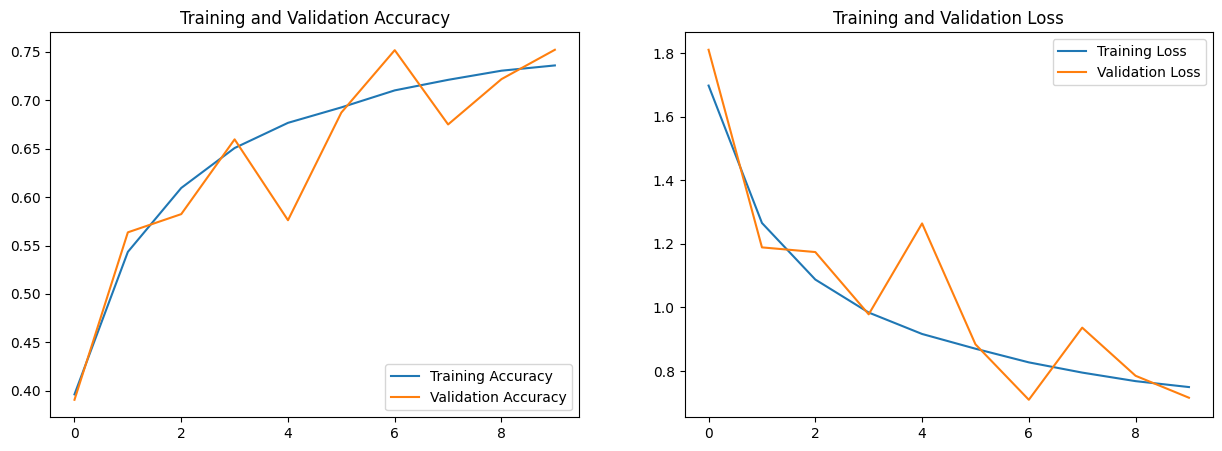

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('accuracy_loss_curve.png', dpi=500)
plt.show()